In [46]:
import pickle
%matplotlib inline
import sys, os
sys.path.append("/Users/chilpert/Work/pyproteinsExt/src")
sys.path.append("/Users/chilpert/Work/pyproteins/src")
%load_ext autoreload
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

#### Load full Pfam annotation

In [47]:
data=pickle.load(open("/Volumes/arwen/mobi/group/NOX_CH/pickle_saved/NOX_annotation_fullPFAM_20190411-174326.pickle","rb"))
print(len(data))

832


#### Create presence/absence matrix

In [93]:
def parse_data(data):
    '''
    Parse data and create 3 dictionnaries : 
    - dic_domain : dictionnary with domains name as key and list of presence/absence as value
    - taxid_index : dictionnary with taxid as key and their index in presence/absence list as value
    - domain_index : dictionnary with domain index as key and domain name as value
    '''
    protein_index={}
    dic_domain={}
    domain_index={}
    c=0
    c_index=0
    c_domain=0
    for k in data :
        c_index+=1
        protein_index[c_index]=k
        for d in data[k]['hmmr']:
            if not d in dic_domain : 
                c_domain+=1
                domain_index[c_domain]=d
                dic_domain[d]=['0' for i in range(len(data))]
            dic_domain[d][c]='1' 
        c+=1
    return dic_domain,protein_index,domain_index    
    
dic_domain,protein_index,domain_index=parse_data(data)

In [94]:
o=open('/Volumes/arwen/mobi/group/NOX_CH/Domain/presence_absence_matrix.txt',"w") #presence/absence matrix
print('Number of domains : ',len(dic_domain))
for d in dic_domain : 
    row=''
    for l in dic_domain[d]:
        row=row+" "+l
    o.write(row+"\n")    
o.close()    

Number of domains :  250


#### Find maximal biclique

Launch MBEA on matrix 
`cmake-build-debug/MBEA /Volumes/arwen/mobi/group/NOX_CH/Domain/presence_absence_matrix.txt improved > ~/test.mbea`

#### Treat maximal biclique

In [95]:
# parse MBEA output
class Biclique:
    def __init__(self,domains,proteins):
        self.domains=domains
        self.proteins=proteins

list_biclique=[]        
f=open("/Users/chilpert/test.mbea","r")
for i in range(5):
    f.readline()
    
for l in f : 
    if l=="\n":
        break
        #print(l)
    domains=[int(d) for d in l.split("|")[0].strip().split(" ")]
    proteins=[int(p) for p in l.split("|")[1].strip().split(" ")]
    b=Biclique(domains,proteins)
    list_biclique.append(b)
    
f.close()         

In [96]:
sorted_list=sorted(list_biclique,key=lambda x:len(x.proteins),reverse=True)

In [110]:
core_domain=sorted_list[0]
print("Maximum core domain contains ",len(core_domain.domains),"domain : ",core_domain.domains," in ",len(core_domain.proteins)," proteins")

core_proteins=set(core_domain.proteins)
all_proteins=set([i for i in range(len(dic_domain)+1,len(protein_index)+len(dic_domain)+1)])
diff=all_proteins.difference(core_proteins)
print(domain_index[1])
for p in diff : 
    prot_id=protein_index[p-len(dic_domain)]
    taxid=data[prot_id]['taxid']
    print(p,prot_id,taxid)

    
    

Maximum core domain contains  1 domain :  [1]  in  827  proteins
NAD_binding_1
1027 tr|A0A2X0WXD6|A0A2X0WXD6_9GAMM 179995
493 tr|A0A154LFT8|A0A154LFT8_9PROT 501834
911 tr|A0A367VJ69|A0A367VJ69_9PROT 502049
851 tr|A0A3C0FM98|A0A3C0FM98_9PROT 1912094
852 tr|A0A2E3QFS7|A0A2E3QFS7_9PROT 1912094


In [111]:
data['tr|A0A2X0WXD6|A0A2X0WXD6_9GAMM']['hmmr'].keys()

dict_keys(['Ferric_reduct', 'NAD_binding_6', 'FAD_binding_8', 'Cohesin_load'])

In [114]:
for k in data : 
    if data[k]['taxid']=='179995':
        print(k)

tr|A0A2X0WXD6|A0A2X0WXD6_9GAMM


In [132]:
a=sorted_list[1]
print(a.domains,len(a.domains))
print(domain_index[2])
print(len(a.proteins))
diff=all_proteins.difference(a.proteins)
print(diff)
print(diff.intersection(core_proteins))

[2] 1
FAD_binding_8
817
{645, 586, 779, 971, 846, 1021, 537, 283, 737, 806, 937, 750, 310, 443, 253}
{737, 645, 806, 937, 586, 779, 971, 846, 750, 443, 310, 537, 283, 1021, 253}


In [149]:
a=set(sorted_list[1].proteins)
b=set(sorted_list[2].proteins)
c=set(sorted_list[0].proteins)
c.difference(b) #seulement 1

{253, 283, 310, 443, 537, 586, 645, 737, 750, 779, 806, 846, 937, 971, 1021}

In [150]:
a.difference(b) #seulement 2 

{493, 851, 852, 911, 1027}

In [154]:
print(protein_index[493-250])
print(protein_index[253-250])

tr|A0A154LFT8|A0A154LFT8_9PROT
tr|A0A1Q8L5Q3|A0A1Q8L5Q3_9PSEU


In [156]:
data['tr|A0A154LFT8|A0A154LFT8_9PROT']['hmmr'].keys()

dict_keys(['Ferric_reduct', 'FAD_binding_8', 'FAD_binding_6', 'NAD_binding_6', 'DUF2157', 'DUF1282'])

In [157]:
data['tr|A0A1Q8L5Q3|A0A1Q8L5Q3_9PSEU']['hmmr'].keys()

dict_keys(['Ferric_reduct', 'NAD_binding_1', 'FAD_binding_6'])

In [167]:
print(sorted_list[8].domains)
print(len(sorted_list[8].proteins))

[1, 4]
699


In [168]:
sorted_list2=sorted(list_biclique,key=lambda x:len(x.proteins))

In [176]:
for b in sorted_list: 
    if len(b.domains)==2: 
        print(b.domains)

[1, 2]
[1, 8]
[2, 8]
[1, 4]
[2, 4]
[4, 8]
[1, 3]
[2, 3]
[3, 8]
[3, 4]


In [192]:
for b in sorted_list : 
    if b.domains==[3,4]: 
        print(len(b.proteins))

512


In [17]:
f=open('/Volumes/arwen/mobi/group/NOX_CH/Domain/presence_absence_matrix.txt',"r")
list_vector=[]
for l in f : 
    list_vector.append(l.strip().split(" "))
f.close()

In [6]:
print(list_vector[0])
print(list_vector[1])

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',

In [7]:
print(len(list_vector[0]))

832


In [16]:
a=list_vector[0]
b=list_vector[1]

In [47]:
matrix=[]
for i in range(len(list_vector)):
    submatrix=[]
    for j in range(len(list_vector)): 
        #print(i,j,dist(list_vector[i],list_vector[j]))
        submatrix.append(dist(list_vector[i],list_vector[j]))
    matrix.append(submatrix)  

In [15]:
def dist(a,b):
    dist=0
    for i in range(len(a)): 
        if a[i]!=b[i]:
            dist+=1 
    return dist     

In [10]:
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

import matplotlib.pyplot as plt

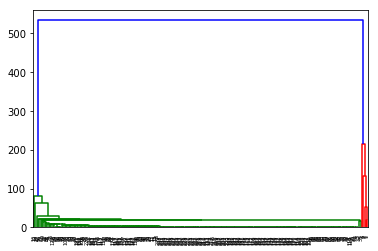

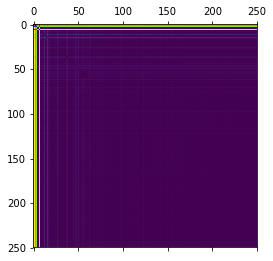

In [48]:
mat=np.array(matrix)
dists=squareform(mat)
linkage_matrix=linkage(dists,"single")
dendrogram(linkage_matrix)
plt.matshow(mat)

In [7]:
linkage_matrix

array([[  0.,   1.,  20.,   2.],
       [  3.,   4., 132.,   3.],
       [  2.,   5., 215.,   4.]])